In [87]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import datetime
import numpy as np
import seaborn as sns
import tensorflow as tf
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
import scipy.signal
import plotly.graph_objects as go
import plotly.offline as pyo

In [88]:
df = pd.read_csv("IB_indexed.csv")

In [89]:
df = df.set_index(['UploadTime'])
df.index = pd.to_datetime(df.index)

In [90]:
display(df)

,ColdTemp,ColdTemp_Insulation,ColdTemp_Insulation_High,ColdTemp_Insulation_Low,Cold_Valve,Consumption,Cooling,Current,Device_ID,ErrorCode,...,TimeStamp,Usage_CC,Usage_L,Usage_MT,UserName,WarmTemp,WarmTemp_Insulation,Warm_Valve,WaterLevel,_id.$oid
UploadTime,,,,,,,,,,,,,,,,,,,,,
2020-08-10 00:00:01,16.0,20,21,15,0,NaN,0,NaN,IB_05_01,0,...,1596988801312,163.0,298.0,46.0,sc_user001,35.0,NaN,0,15,5f301d819cddf110824dbae9
2020-08-10 00:00:01,18.0,20,21,15,0,NaN,0,NaN,IB_03_01,0,...,1596988801246,402.0,916.0,56.0,sc_user001,32.0,NaN,0,22,5f301d829cddf110824dbc42
2020-08-10 00:00:02,18.0,20,21,15,0,NaN,0,NaN,IB_04_01,0,...,1596988802284,116.0,925.0,86.0,sc_user001,34.0,NaN,0,15,5f301d839cddf110824dbdd3
2020-08-10 00:00:30,16.0,20,21,15,0,NaN,0,NaN,IB_05_01,0,...,1596988830874,163.0,298.0,46.0,sc_user001,34.0,NaN,0,15,5f301d9f9cddf110824dca9b
2020-08-10 00:00:27,18.0,20,21,15,0,NaN,0,NaN,IB_03_01,0,...,1596988827289,402.0,916.0,56.0,sc_user001,32.0,NaN,0,22,5f301da09cddf110824dcc25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-13 23:59:30,16.0,20,21,15,0,NaN,0,NaN,IB_05_01,0,...,1600012770943,389.0,514.0,46.0,sc_user001,32.0,NaN,0,15,5f5e41e3a93bea016fcf80c1
2020-09-13 23:59:31,17.0,20,21,15,0,NaN,0,NaN,IB_03_01,0,...,1600012771962,228.0,254.0,57.0,sc_user001,32.0,NaN,0,22,5f5e41e4a93bea016fcf83d7
2020-09-13 23:59:02,17.0,20,21,15,0,NaN,0,NaN,IB_03_01,0,...,1600012742230,NaN,NaN,NaN,sc_user001,32.0,NaN,0,22,5f5e41e4a93bea016fcf8423


In [91]:
display(df["Device_ID"].describe().transpose())

count       485643
unique           3
top       IB_04_01
freq        192841
Name: Device_ID, dtype: object

In [92]:
# make dataframe with only IB_03_01
df_device3 = df.loc[(df["Device_ID"] == "IB_03_01")]
display(df_device3["Device_ID"].describe().transpose())
# display(df_device3)

count       192319
unique           1
top       IB_03_01
freq        192319
Name: Device_ID, dtype: object

(0.0, 1200.0)

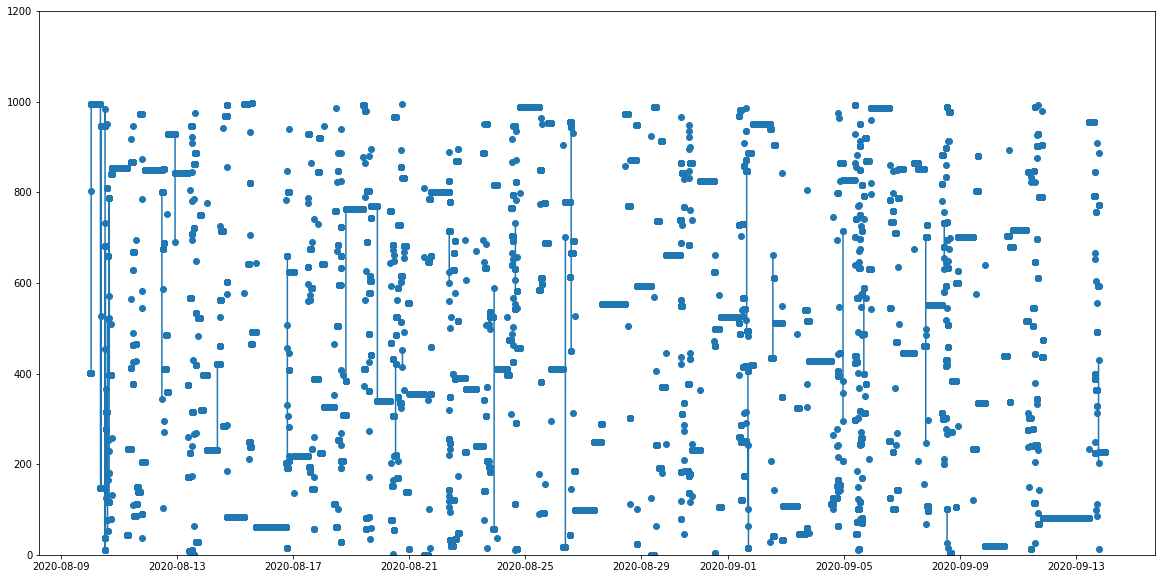

In [93]:
plt.figure(figsize=(20,10))
# plt.scatter(df_device3.index, df_device3["Usage_CC"])
plt.plot(df_device3.index, df_device3["Usage_CC"], "-o")
plt.gca().set_ylim(0, 1200)

(18494.0, 18495.0)

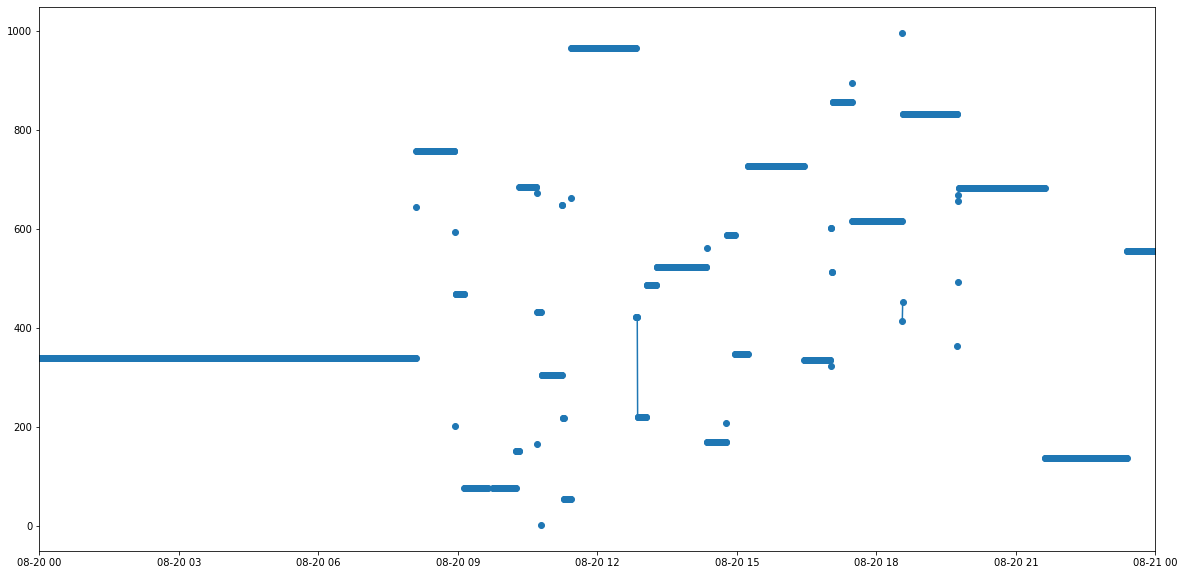

In [94]:
plt.figure(figsize=(20,10))
plt.plot(df_device3.index, df_device3["Usage_CC"], "-o")
plt.gca().set_xlim([datetime.datetime.strptime("2020-08-20 00:00:00", "%Y-%m-%d %H:%M:%S"),
                    datetime.datetime.strptime("2020-08-21 00:00:00", "%Y-%m-%d %H:%M:%S")])

(18506.0, 18507.0)

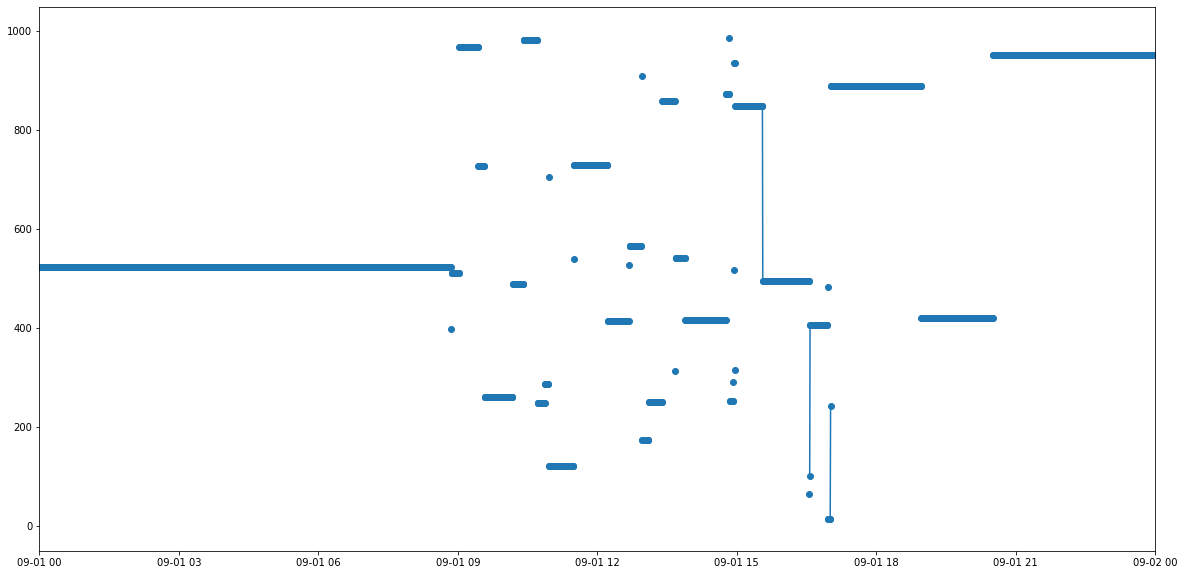

In [95]:
plt.figure(figsize=(20,10))
plt.plot(df_device3.index, df_device3["Usage_CC"], "-o")
plt.gca().set_xlim([datetime.datetime.strptime("2020-09-01 00:00:00", "%Y-%m-%d %H:%M:%S"),
                    datetime.datetime.strptime("2020-09-02 00:00:00", "%Y-%m-%d %H:%M:%S")])

(18506.0, 18507.0)

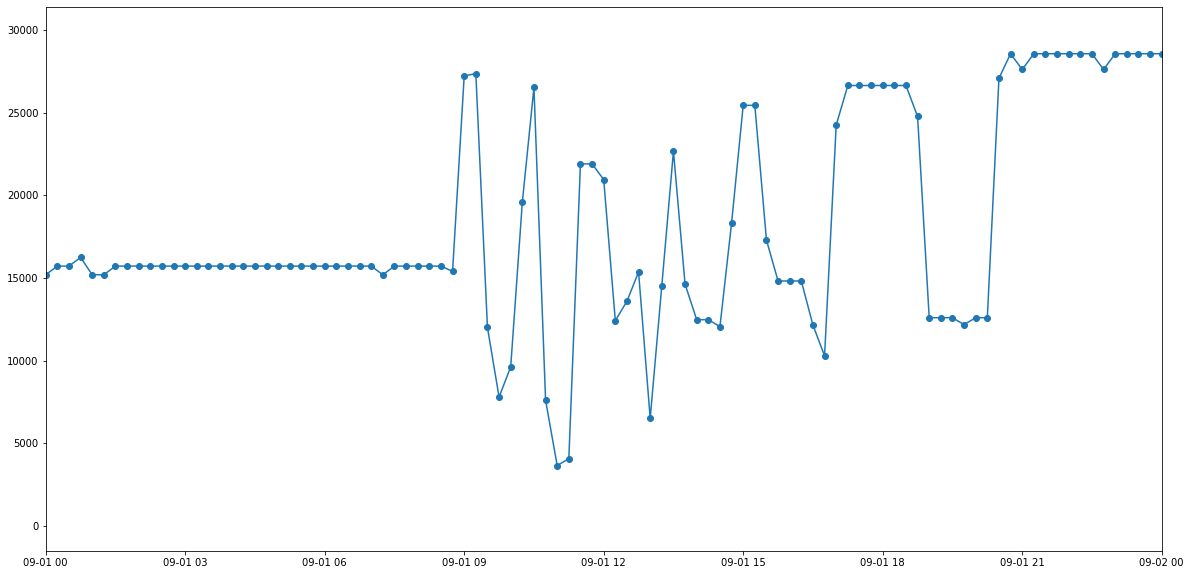

In [101]:
df_device3_sum = df_device3.resample('15min').sum()
plt.figure(figsize=(20,10))
plt.plot(df_device3_sum.index, df_device3_sum["Usage_CC"], "-o")
plt.gca().set_xlim([datetime.datetime.strptime("2020-09-01 00:00:00", "%Y-%m-%d %H:%M:%S"),
                    datetime.datetime.strptime("2020-09-02 00:00:00", "%Y-%m-%d %H:%M:%S")])

(18506.0, 18507.0)

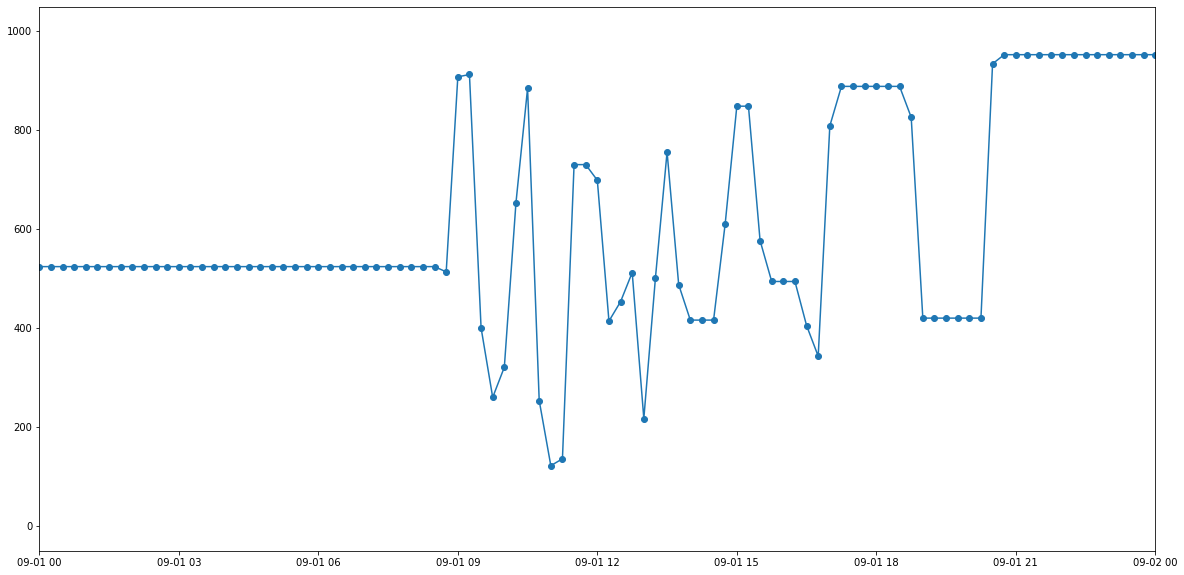

In [102]:
df_device3_mean = df_device3.resample('15min').mean()
plt.figure(figsize=(20,10))
plt.plot(df_device3_mean.index, df_device3_mean["Usage_CC"], "-o")
plt.gca().set_xlim([datetime.datetime.strptime("2020-09-01 00:00:00", "%Y-%m-%d %H:%M:%S"),
                    datetime.datetime.strptime("2020-09-02 00:00:00", "%Y-%m-%d %H:%M:%S")])

In [67]:
# make dataframe with only IB_04_01
df_device4 = df.loc[(df["Device_ID"] == "IB_04_01")]
display(df_device4["Device_ID"].describe().transpose())
# display(df_device4)

count       192841
unique           1
top       IB_04_01
freq        192841
Name: Device_ID, dtype: object

(0.0, 1200.0)

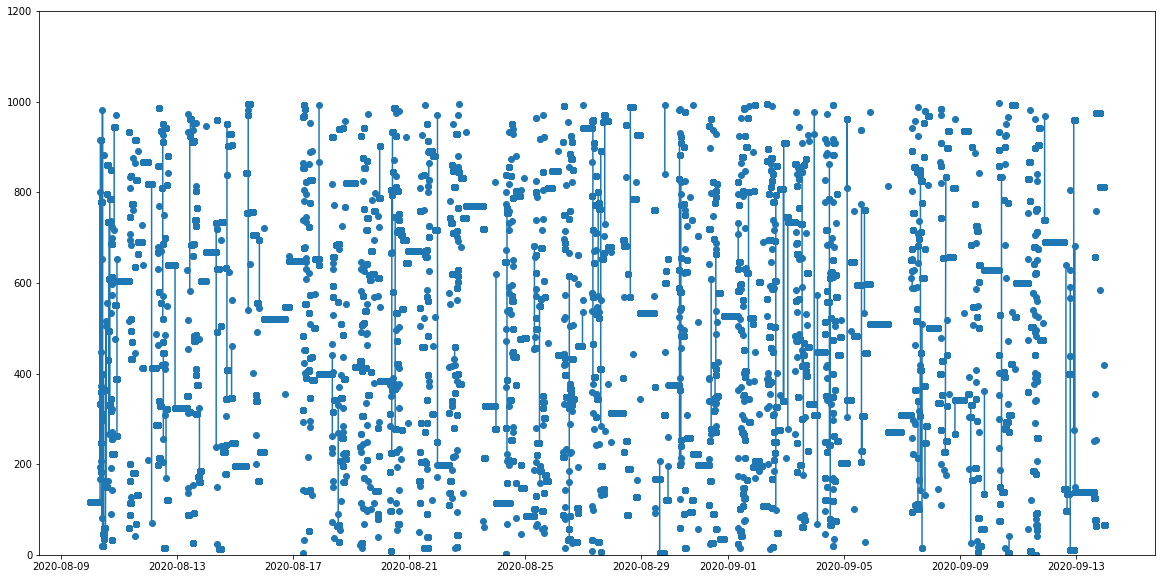

In [64]:
plt.figure(figsize=(20,10))
plt.plot(df_device4.index, df_device4["Usage_CC"], "-o")
plt.gca().set_ylim(0, 1200)

In [68]:
# make dataframe with only IB_05_01
df_device5 = df.loc[(df["Device_ID"] == "IB_05_01")]
display(df_device5["Device_ID"].describe().transpose())
# display(df_device5)

count       100483
unique           1
top       IB_05_01
freq        100483
Name: Device_ID, dtype: object

(0.0, 1200.0)

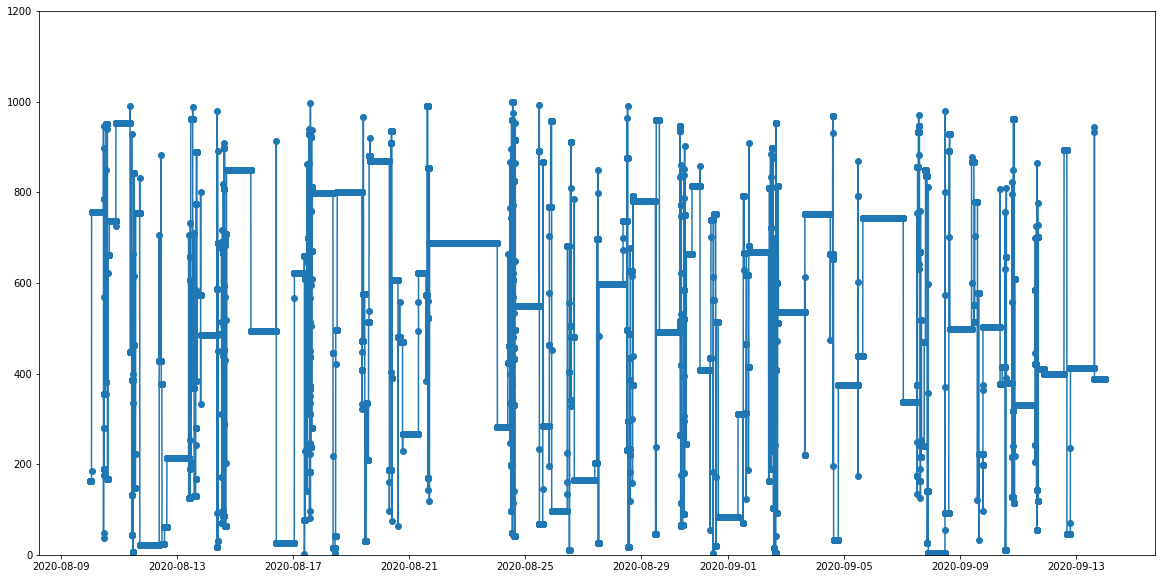

In [69]:
plt.figure(figsize=(20,10))
plt.plot(df_device5.index, df_device5["Usage_CC"], "-o")
plt.gca().set_ylim(0, 1200)

In [103]:
df_device3_sum.isna().sum()

ColdTemp                    0
ColdTemp_Insulation         0
ColdTemp_Insulation_High    0
ColdTemp_Insulation_Low     0
Cold_Valve                  0
Consumption                 0
Cooling                     0
Current                     0
ErrorCode                   0
Filter_Hint                 0
Filter_Usage                0
Heating                     0
HotTemp                     0
HotTemp_Insulation          0
HotTemp_Insulation_High     0
HotTemp_Insulation_Low      0
Hot_Valve                   0
Meter                       0
Refilling                   0
SavingPower                 0
Status                      0
Sterilizing                 0
TDS                         0
TimeStamp                   0
Usage_CC                    0
Usage_L                     0
Usage_MT                    0
WarmTemp                    0
WarmTemp_Insulation         0
Warm_Valve                  0
WaterLevel                  0
dtype: int64

In [115]:
description = df_device3_sum.describe().transpose()
display(description)

,count,mean,std,min,25%,50%,75%,max
ColdTemp,3360.0,1.146771e+03,7.038090e+02,8.400000e+01,8.850000e+02,1.020000e+03,1.160000e+03,5.953000e+03
ColdTemp_Insulation,3360.0,1.144756e+03,9.108587e+01,1.200000e+02,1.120000e+03,1.160000e+03,1.180000e+03,1.220000e+03
ColdTemp_Insulation_High,3360.0,1.201994e+03,9.564016e+01,1.260000e+02,1.176000e+03,1.218000e+03,1.239000e+03,1.281000e+03
ColdTemp_Insulation_Low,3360.0,8.585670e+02,6.831440e+01,9.000000e+01,8.400000e+02,8.700000e+02,8.850000e+02,9.150000e+02
Cold_Valve,3360.0,1.011905e-01,5.383742e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00
Consumption,3360.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Cooling,3360.0,1.869048e+00,7.225793e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.900000e+01
Current,3360.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
ErrorCode,3360.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Filter_Hint,3360.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [105]:
# drop columns with NaN > 50% or std = 0

# df = df.loc[:, df.isna().mean() < .50]
# df.isna().sum()

In [106]:
# make time-based sessions
night = datetime.time(0,0,0)
morning = datetime.time(6,0,0)
noon = datetime.time(12,0,0)
evening = datetime.time(18,0,0)
def output_session(input_dt):
    out = []
    for upload in input_dt:
        input_time = upload.time()
        sess = ""
        if night < input_time < morning:
            sess = "night"
        elif morning < input_time < noon:
            sess = "morning"
        elif noon < input_time < evening:
            sess = "afternoon"
        else:
            sess = "evening"
        out.append(sess)
    return out
df_device3_sum["session"] = output_session(df_device3_sum.index)
display(df_device3_sum["session"])

UploadTime
2020-08-10 00:00:00    evening
2020-08-10 00:15:00      night
2020-08-10 00:30:00      night
2020-08-10 00:45:00      night
2020-08-10 01:00:00      night
                        ...   
2020-09-13 22:45:00    evening
2020-09-13 23:00:00    evening
2020-09-13 23:15:00    evening
2020-09-13 23:30:00    evening
2020-09-13 23:45:00    evening
Freq: 15T, Name: session, Length: 3360, dtype: object

In [107]:
# differentiate weekdays and weekends
def output_weekend(input_dt):
    out = []
    for upload in input_dt:
        if upload.weekday() == 5 or upload.weekday() == 6:
            out.append(1)
        else: out.append(0)
    return out
df_device3_sum["weekend"] = output_weekend(df_device3_sum.index)
display(df_device3_sum["weekend"])

UploadTime
2020-08-10 00:00:00    0
2020-08-10 00:15:00    0
2020-08-10 00:30:00    0
2020-08-10 00:45:00    0
2020-08-10 01:00:00    0
                      ..
2020-09-13 22:45:00    1
2020-09-13 23:00:00    1
2020-09-13 23:15:00    1
2020-09-13 23:30:00    1
2020-09-13 23:45:00    1
Freq: 15T, Name: weekend, Length: 3360, dtype: int64

In [108]:
# combine all usage data into usage_all
# unit: liters

# sum = 0.000001*df_resample["Usage_CC"] + 0.001*df_resample["Usage_L"] + df_resample["Usage_MT"]
# df_resample["usage_all"] = sum
# display(df_resample["usage_all"])

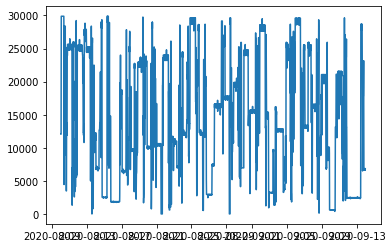

In [109]:
plt.plot(df_device3_sum.index, df_device3_sum["Usage_CC"])
# plt.plot(df_resample.index, df_resample["Usage_CC"])
# plt.plot(df_resample.index, df_resample["Usage_L"], color="green")
# plt.plot(df_resample.index, df_resample["Usage_MT"], color="orange")
# plt.show()

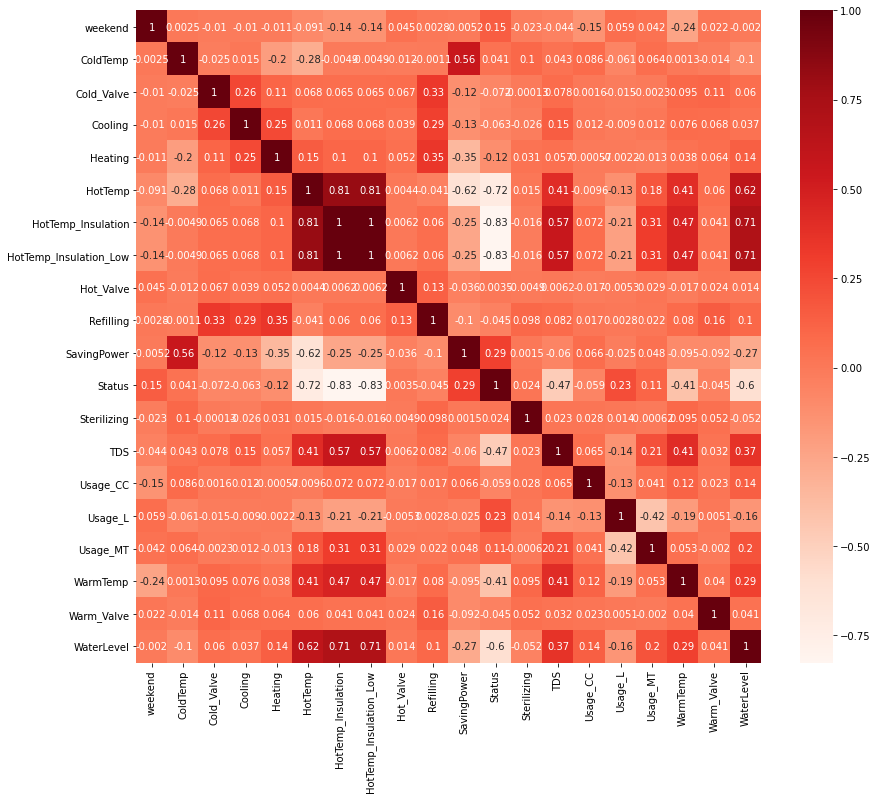

In [114]:
relevant_columns = ["session", "weekend", "ColdTemp", "Cold_Valve", "Cooling", "Heating", "HotTemp", "HotTemp_Insulation", "HotTemp_Insulation_Low", "Hot_Valve", "Refilling", "SavingPower", "Status", "Sterilizing", "TDS", "Usage_CC", "Usage_L", "Usage_MT", "WarmTemp", "Warm_Valve", "WaterLevel"]
df_relevant = df_device3_sum[relevant_columns]
plt.figure(figsize=(14,12))
cor = df_relevant.corr(method='spearman')
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

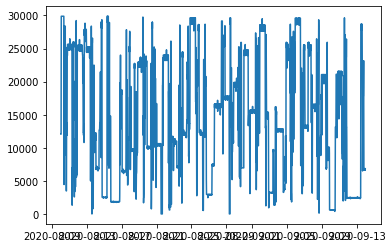

In [121]:
# smoothing
df_device3_sum_smoothed = scipy.signal.savgol_filter(df_device3_sum["Usage_CC"], 7, 5)
plt.plot(df_device3_sum.index, df_device3_sum["Usage_CC"])
plt.plot(df_device3_sum.index, df_device3_sum_smoothed["Usage_CC"], color='red')

In [122]:
# split data into train, val, and test
n = len(df_device3_sum)
train_df = df_device3_sum[0:int(n*0.7)]
val_df = df_device3_sum[int(n*0.7):int(n*0.9)]
test_df = df_device3_sum[int(n*0.9):]

In [124]:
train_mean = train_df["Usage_CC"].mean()
train_std = train_df["Usage_CC"].std()

train_df = (train_df["Usage_CC"] - train_mean) / train_std
val_df = (val_df["Usage_CC"] - train_mean) / train_std
test_df = (test_df["Usage_CC"] - train_mean) / train_std

In [125]:
print(train_df[:10])

UploadTime
2020-08-10 00:00:00   -0.358427
2020-08-10 00:15:00   -0.358427
2020-08-10 00:30:00   -0.358427
2020-08-10 00:45:00    1.548386
2020-08-10 01:00:00    1.636372
2020-08-10 01:15:00    1.636372
2020-08-10 01:30:00    1.636372
2020-08-10 01:45:00    1.636372
2020-08-10 02:00:00    1.636372
2020-08-10 02:15:00    1.636372
Freq: 15T, Name: Usage_CC, dtype: float64


In [126]:
def split_window(sequence, steps):
    x_input, y_label = list(), list()
    for i in range(len(sequence)):
        window_end = i + steps
        if window_end == len(sequence):
            break
        x_input.append(sequence[i:window_end])
        y_label.append(sequence[window_end])
    return np.array(x_input), np.array(y_label)

In [127]:
# split to 6-hr windows, 5 inputs and 1 label
n_steps = 5
x_train, y_train = split_window(train_df, n_steps)
x_val, y_val = split_window(val_df, n_steps)
x_test, y_test = split_window(test_df, n_steps)
# for i in range(len(x)):
#     print(x[i], y[i])

In [128]:
print(x_train)

[[-0.35842749 -0.35842749 -0.35842749  1.54838551  1.6363716 ]
 [-0.35842749 -0.35842749  1.54838551  1.6363716   1.6363716 ]
 [-0.35842749  1.54838551  1.6363716   1.6363716   1.6363716 ]
 ...
 [-0.65663988 -0.62037081 -0.62037081 -0.62037081 -1.33612532]
 [-0.62037081 -0.62037081 -0.62037081 -1.33612532 -1.55396365]
 [-0.62037081 -0.62037081 -1.33612532 -1.55396365 -1.55396365]]


In [129]:
# reshape from [samples, timesteps] to [samples, timesteps, features]
n_features = 1
x_train = x_train.reshape((x_train.shape[0],x_train.shape[1],n_features))
x_val = x_val.reshape(x_val.shape[0],x_val.shape[1],n_features)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],n_features)

In [130]:
print(x_train[:5])

[[[-0.35842749]
  [-0.35842749]
  [-0.35842749]
  [ 1.54838551]
  [ 1.6363716 ]]

 [[-0.35842749]
  [-0.35842749]
  [ 1.54838551]
  [ 1.6363716 ]
  [ 1.6363716 ]]

 [[-0.35842749]
  [ 1.54838551]
  [ 1.6363716 ]
  [ 1.6363716 ]
  [ 1.6363716 ]]

 [[ 1.54838551]
  [ 1.6363716 ]
  [ 1.6363716 ]
  [ 1.6363716 ]
  [ 1.6363716 ]]

 [[ 1.6363716 ]
  [ 1.6363716 ]
  [ 1.6363716 ]
  [ 1.6363716 ]
  [ 1.6363716 ]]]


In [131]:
# vanilla lstm: only one hidden layer of lstm + one output layer
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', # optimizer
              loss='mse',
             metrics=[tf.metrics.MeanAbsoluteError()]) 

In [132]:
# fit model
model.fit(x_train, y_train, epochs=200, verbose=0
          , validation_data=(x_val, y_val)
         )

In [133]:
# evaluate model using test data
results = model.evaluate(x_test, y_test)

11/11 [==============================] - 0s 723us/step - loss: 0.1190 - mean_absolute_error: 0.1500


In [134]:
# generate predictions
predictions = model.predict(x_test, verbose=0)
print(predictions[:5])

[[-0.09485608]
 [-0.27013868]
 [-0.3222822 ]
 [-0.20589763]
 [-0.20801815]]


(18516.0, 18518.0)

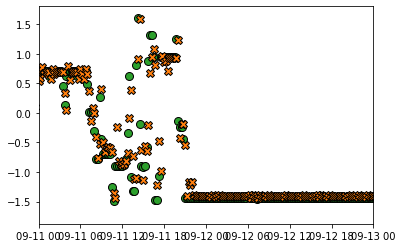

In [135]:
# blue line
plt.plot(df_device3_sum.index[n_steps:int(n*0.7)], y_train,
        label='Inputs', marker='.', zorder=-10)
# purple line
plt.plot(df_device3_sum.index[int(n*0.7)+n_steps:int(n*0.9)], y_val,
        label='Val', marker='.', zorder=-10)
# green dots
plt.scatter(df_device3_sum.index[int(n*0.9)+n_steps:], y_test,
            edgecolors='k', label='Labels', c='#2ca02c', s=64)
# orange x's
plt.scatter(df_device3_sum.index[int(n*0.9)+n_steps:], predictions,
            marker='X', edgecolors='k', label='Predictions',
            c='#ff7f0e', s=64)
axes = plt.gca()
axes.set_xlim([datetime.datetime.strptime("2020-09-11 00:00:00", "%Y-%m-%d %H:%M:%S"), datetime.datetime.strptime("2020-09-13 00:00:00", "%Y-%m-%d %H:%M:%S")])